Steps
1. Install dependencies
2. Collect Dataset
3. Writie Script
4. Analyze Graph


## Step 1

Install Dependencies

pip install csv (read data), numpy (perform calculation), scikit-learn (build the predictive model), matplotlib (plot graph)

In [2]:
import csv
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Step 2 & 3 

In [3]:
#initialize two empty list
num = []
accuracy = []

#function that will fill them both with the relevant data
def get_data(hyperp_new):
    with open(hyperp_new, 'r' ) as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            num.append(int(row[0]))
            accuracy.append(float(row[1]))
    return

![Alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBfskiOe2Ey1ecABUbWvZWDlQD06zaOeDqiexoQG-uakqJ7pu1) 

A support vector machine is a linear seperator. It takes data that's already classified and try to predict a set of unclassified data. so if we only have two data classes it would look like below. it will be the line such that the distances from the closest points in each of the two groups would be farthest away. When we add a new data point to our graph depending on which side of the line it is, we could classify accordingly with a label.

![Alt text](https://66.media.tumblr.com/0e459c9df3dc85c301ae41db5e058cb8/tumblr_inline_n9xq5hiRsC1rmpjcz.jpg)

But right now, we are not predicting a class label , so we dont need to classify. Instead, we predicting the next value in a series which means we want to use regression. SVM can be use for regression. Support Vector Regression is a type of SVM that uses the space between data points as a margin of error and predicts the most likely next point in a data set.

![Alt text](https://i.stack.imgur.com/ZyGQp.png)

We want two thing with SVR

1. A line with the largest minimum margin
2. A line that coreectly separates as many instances as possible

But we can't always have both. "C" determines how much we want the latter. 

In [4]:
import pandas as pd 

tmp_df = pd.read_csv("hyperp_new.csv")
num = tmp_df.values[:,2:]
accuracy = tmp_df.values[:,1]

x_train, x_test, y_train, y_test = train_test_split(num, accuracy, test_size=0.3, random_state=1)

tmp_df.head()

,num,accuracy,no_epochs,learning_rate,batch_size,momentum,loss
0,1,0.7222,11,0.002,32,0.99,0.850903
1,2,0.6919,10,0.002,32,0.99,0.901699
2,3,0.6976,10,0.002,64,0.99,0.890156
3,4,0.6639,10,0.001,128,0.95,1.003658
4,5,0.6293,10,0.002,64,0.95,1.103251


In [5]:
# svr_lin = SVR(kernel= 'linear', C=1e3, gamma='auto')
# svr_poly = SVR(kernel= 'poly', C=1e3, gamma='auto', degree = 3, epsilon=.1, coef0=1)
svr_rbf = SVR(kernel= 'rbf', C=13.524952616526956, degree=25, epsilon=0.010443805254121885)

# svr_lin.fit(x_train, y_train)
# svr_poly.fit(x_train, y_train)
svr_rbf.fit(x_train, y_train)

SVR(C=13.524952616526956, cache_size=200, coef0=0.0, degree=25,
  epsilon=0.010443805254121885, gamma='auto', kernel='rbf', max_iter=-1,
  shrinking=True, tol=0.001, verbose=False)

```
from hyperopt import fmin, tpe, hp
from hyperopt import STATUS_OK, Trials

def f(params):
    svr_model = SVR(kernel=params['kernel'], C=params['C'], degree=params['degree'], epsilon=params['epsilon'])
    svr_model.fit(x_train, y_train)
    svr_model_predict = svr_model.predict(x_test)
    try: r2_score(y_test, svr_model_predict)
    except: return 1000
    print(f"{r2_score(y_test, svr_model_predict)} {params}")
    return -r2_score(y_test, svr_model_predict)

space = {
    "kernel": hp.choice('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
    "degree": hp.randint('degree', 50),
    "C": hp.uniform('C', 0, 20),
    "epsilon": hp.loguniform('epsilon', -5, 5),
}

trials = Trials()
best = fmin(fn=f, space=space, algo=tpe.suggest, max_evals=500, trials=trials)
print(f"Best parameters: {best}")
```

In [7]:
# svr_lin_y_train_predict = svr_lin.predict(x_test)
# print("R-Squared for SVR (linear): " + str(r2_score(y_test, svr_lin_y_train_predict)))

# svr_poly_y_train_predict = svr_poly.predict(x_test)
# print("R-Squared for SVR (poly): " + str(r2_score(y_test, svr_poly_y_train_predict)))

svr_rbf_y_train_predict = svr_rbf.predict(x_test)
print("R-Squared for SVR (RBF): " + str(r2_score(y_test, svr_rbf_y_train_predict)))

R-Squared for SVR (RBF): 0.7058079825570589


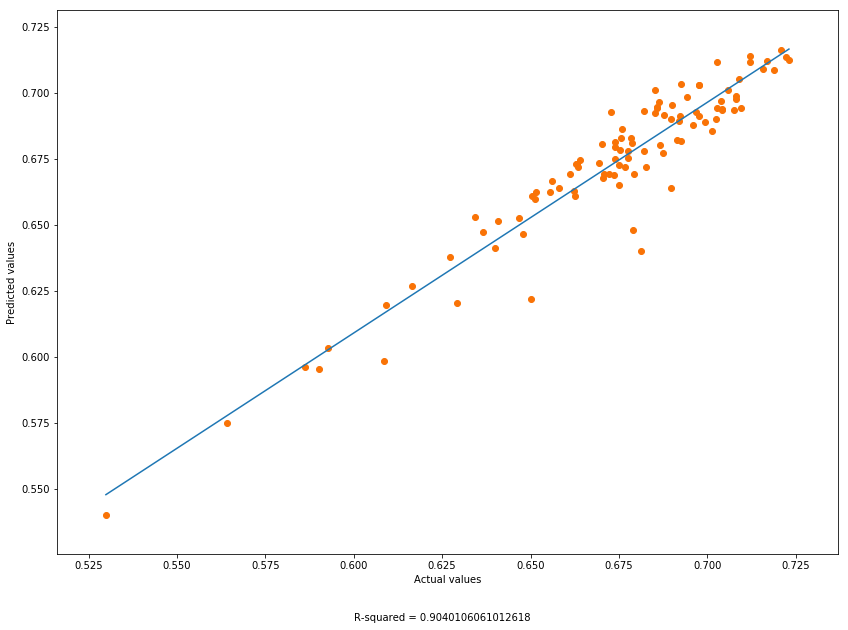

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))

Y = accuracy
Y_pred = svr_rbf.predict(num)

r_squared = r2_score(Y, Y_pred)
plt.scatter(Y,Y_pred, c='xkcd:orange')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(Y), np.poly1d(np.polyfit(Y, Y_pred, 1))(np.unique(Y)))

plt.text(0.6, 0.5, f"R-squared = {r_squared}")
plt.show()